### Introduction

In the following notebook, I will be exploring the listings data set to find potential relationships of interest.

**Read in libraries**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [125]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set Visualization preferences
plt.style.use('bmh')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Visualizations\Listings EDA'

**Read in data**

In [126]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\02_Cleaned'

#Write file
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', index_col=0,
                parse_dates=['host_since','last_review'])

### Data Overview

**Preview Data**

In [127]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (113994, 73)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price,zipcode
0,Full access to patio and backyard shared wit...,3,TV Cable TV Internet Wifi Kitchen Pets liv...,25,106,43,58,1.00,Real Bed,1.00,2.00,1,0,0,3 weeks ago,moderate,San Francisco,100.00,New update the house next door is under const...,25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1.00,1169,1.00,1.00,1.00,San Francisco California United States,Holly,Duboce Triangle,90.00,within an hour,2008-07-31,email phone facebook reviews kba,No Pets even visiting guests for a short t...,958,1,A family of 4 lives upstairs with their dog N...,1,2020-03-13,37.77,STR 0001256,-122.43,1125,1,4200.00,Bright Modern Garden Unit 1BR 1B,Quiet cul de sac in friendly neighborhood St...,Western Addition,Due to the fact that we have children and a do...,240,56,170.00,Apartment,0,0,1,10.00,10.00,10.00,10.00,10.00,97.00,9.00,1.84,Entire home apt,100.00,Newly remodeled modern and bright garden uni...,New update the house next door is under const...,Public Transportation is 1 2 block away Ce...,1120.00,94117
1,Our deck garden gourmet kitchen and extensiv...,5,Internet Wifi Kitchen Heating Family kid fri...,0,0,0,0,1.00,Real Bed,2.00,3.00,1,0,0,2 weeks ago,strict 14 with grace period,San Francisco,100.00,We live in a large Victorian house on a quiet ...,0.00,2009-05-03,2,Philip English transplant to the Bay Area and...,1.00,8904,1.00,0.00,2.00,San Francisco California United States,Philip And Tania,Bernal Heights,100.00,within a day,2009-03-02,email phone reviews kba work ema...,Please respect the house the art work the fu...,5858,0,NaN,1,2017-08-06,37.75,NaN,-122.42,60,30,5500.00,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235.00,Apartment,0,0,1,10.00,10.00,10.00,10.00,10.00,98.00,9.00,0.83,Entire home apt,nan,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,1600.00,94110
2,NaN,2,TV Internet Wifi Kitchen Free street parking...,30,365,60,90,4.00,Real Bed,1.00,1.00,9,9,0,5 months ago,strict 14 with grace period,San Francisco,50.00,Nice and good public transportation 7 minute...,12.00,2009-08-31,1,7 minutes walk to UCSF hospital school campu...,1.00,21994,1.00,0.00,10.00,San Francisco California United States,Aaron,Cole Valley,100.00,within an hour,2009-06-17,email phone reviews jumio govern...,No party No smoking not for any kinds of smo...,7918,0,NaN,1,2020-03-06,37.77,NaN,-122.45,60,32,1685.00,A Friendly Room UCSF USF San Francisco,Shopping old town restaurants McDonald Whol...,Haight Ashbury,Wi Fi signal in common areas Large eat in k...,19,2,65.00,Apartment,0,0,1,7.00,9.00,8.00,9.00,9.00,84.00,8.00,0.15,Private room,200.00,Settle down S F resident student hospital ...,Nice and good public transportation 7 minute...,N Juda Muni and bus stop Street par

**Variable Info**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113994 entries, 0 to 7932
Data columns (total 73 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   access                                        71481 non-null   object        
 1   accommodates                                  113994 non-null  int64         
 2   amenities                                     113994 non-null  object        
 3   availability_30                               113994 non-null  int64         
 4   availability_365                              113994 non-null  int64         
 5   availability_60                               113994 non-null  int64         
 6   availability_90                               113994 non-null  int64         
 7   bathrooms                                     113854 non-null  float64       
 8   bed_type                                      113994 non

**View data description**

In [129]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,113994.00,3.15,1.91,1.00,2.00,2.00,4.00,16.00
availability_30,113994.00,10.53,11.53,0.00,0.00,5.00,22.00,30.00
availability_365,113994.00,156.34,132.69,0.00,27.00,129.00,291.00,365.00
availability_60,113994.00,24.57,22.78,0.00,0.00,20.00,47.00,60.00
availability_90,113994.00,40.47,33.94,0.00,3.00,38.00,73.00,90.00
bathrooms,113854.00,1.39,0.91,0.00,1.00,1.00,1.50,14.00
bedrooms,113948.00,1.34,0.94,0.00,1.00,1.00,2.00,30.00
beds,113746.00,1.74,1.19,0.00,1.00,1.00,2.00,30.00
calculated_host_listings_count,113994.00,25.13,60.85,1.00,1.00,2.00,11.00,301.00
calculated_host_listings_count_private_rooms,113994.00,3.63,9.90,0.00,0.00,0.00,2.00,87.00


### Exploratory Data Analysis

#### Price

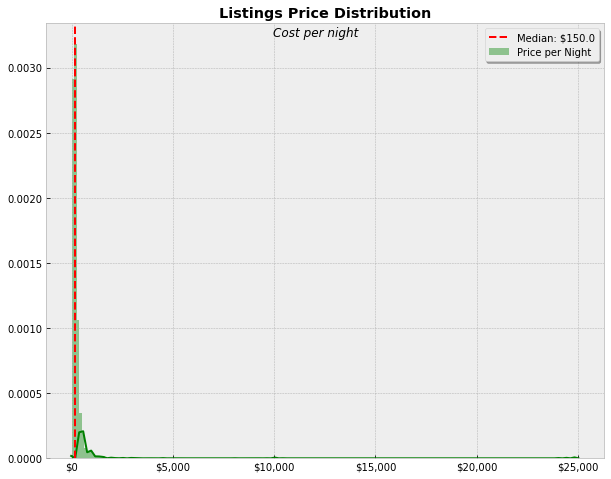

In [130]:
#Set figure
f, ax = plt.subplots(figsize = (10,8))

#Plot hist of price variable
j = sns.distplot(df.price, bins=200,ax = ax, color = 'green', label = 'Price per Night')

###Set Plot Aesthetics###
#Titles
j.set_title('Listings Price Distribution', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

#PLot price median
median = df.price.median()
plt.axvline(median, color='r', linestyle='--', label = 'Median: ${}'.format(round(median)))

#legend
plt.legend(shadow = True, frameon =True)

# #Save to Visualizations file
# plt.savefig(eda_path + '/price_hist.png', bbox_inches='tight')

Airbnb offers a service known as Airbnb Luxe which offers pristine, expertly designed homes with luxury amenities, services, and a dedicated trip designer. This would explain the extreme rental prices for a one night stay

#### Prices by time

**Prep data**

In [131]:
#Subset target with last_review date
time = df.loc[:,['last_review','price']]

#Extract time data from last_review
time['year'] = df['last_review'].dt.year
time['month']= df['last_review'].dt.month_name()
time['weekday']= df['last_review'].dt.day_name()

# #Set last review as index
# time.set_index('last_review', inplace = True)

#Check
time.head(15)

,last_review,price,year,month,weekday
0,2020-03-13,170.00,2020.00,March,Friday
1,2017-08-06,235.00,2017.00,August,Sunday
2,2020-03-06,65.00,2020.00,March,Friday
3,2018-09-12,65.00,2018.00,September,Wednesday
4,2019-06-28,703.00,2019.00,June,Friday
5,2020-03-16,139.00,2020.00,March,Monday
6,2020-02-08,135.00,2020.00,February,Saturday
7,2019-05-27,150.00,2019.00,May,Monday
8,2015-05-17,120.00,2015.00,May,Sunday
9,2018-12-01,177.00,2018.00,December,Saturday


**Month**

Text(0.5, 0, '')

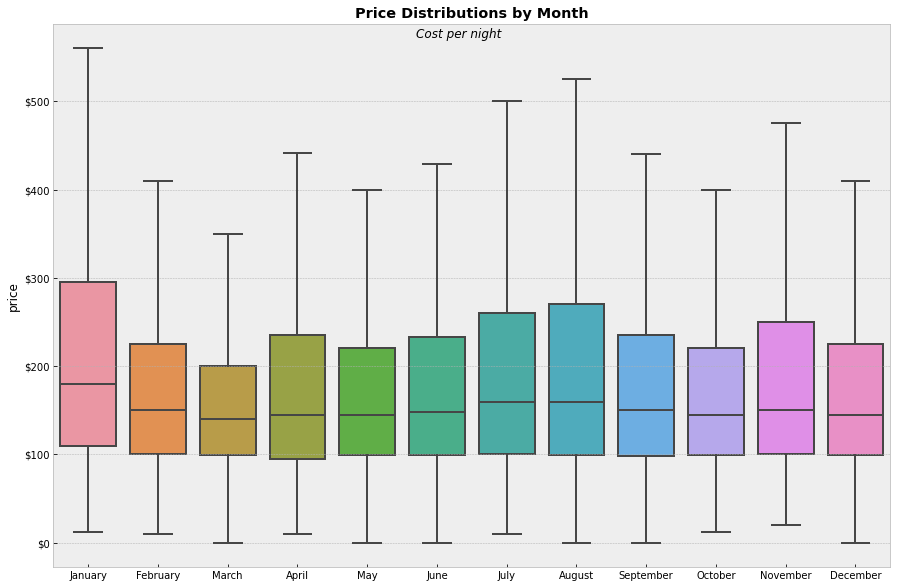

In [132]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'month', y = 'price',
                order = ['January', 'February', 'March' ,'April', 'May', 'June', 'July', 
                         'August' ,'September', 'October' ,'November', 'December'],
                data = time, showfliers = False,ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Month', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

# #Save to Visualizations file
# plt.savefig(eda_path + '/month_price_box.png', bbox_inches='tight')

**Weekday**

Text(0.5, 0, '')

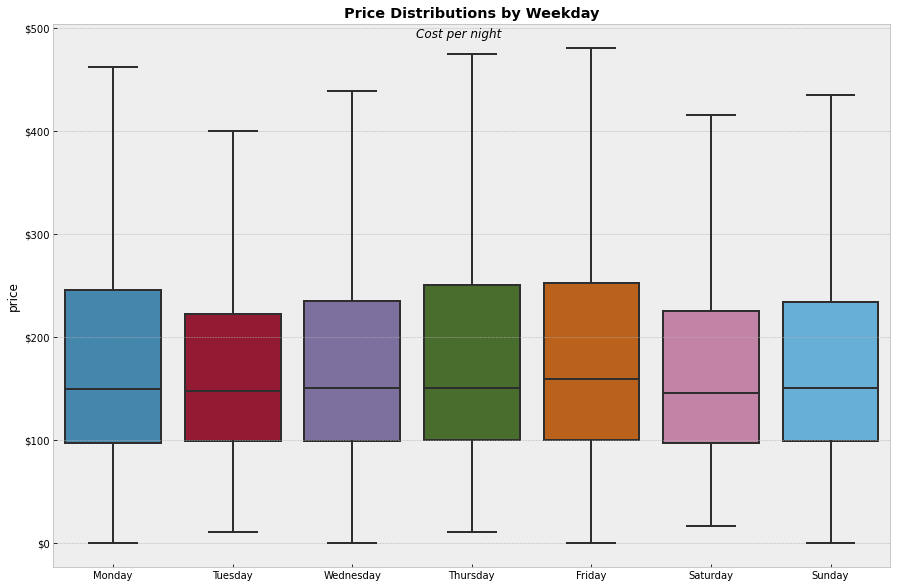

In [133]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'weekday', y = 'price', data =time, showfliers = False,
                order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'], ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Weekday', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

# #Save to Visualizations file
# plt.savefig(eda_path + '/weekday_price_box.png', bbox_inches='tight')

### Investigating Prices by neighborhood

In [134]:
#Import geopandas
import geopandas as gpd

#Set path to in SF geojson data
fname = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\References/Airbnb Neighbourhoods.geojson'

#load geojson fit into neighborhoods
neighbourhoods = gpd.read_file(fname)

#Clean up neighborhoods
neighbourhoods.sort_values(by = 'neighbourhood', inplace=True)
neighbourhoods.drop('neighbourhood_group', inplace = True, axis = 1)

#Check
display(neighbourhoods.head())

,neighbourhood,geometry
20,Bayview,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881..."
29,Bernal Heights,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281..."
27,Castro/Upper Market,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464..."
30,Chinatown,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088..."
11,Crocker Amazon,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238..."


In [135]:
#Assign average rent per night to geo data for plotting
neighbourhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean().values

#Create coords column to plot neighborhood name on visualization
neighbourhoods['coords'] = neighbourhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
neighbourhoods['coords'] = [coords[0] for coords in neighbourhoods['coords']]

#Check
display(neighbourhoods.head(10))

,neighbourhood,geometry,avg_price,coords
20,Bayview,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881...",122.21,"(-122.38268808592301, 37.730317)"
29,Bernal Heights,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281...",189.61,"(-122.41590699682232, 37.740382999999994)"
27,Castro/Upper Market,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464...",252.27,"(-122.43585763549383, 37.762481)"
30,Chinatown,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088...",185.09,"(-122.40705036483192, 37.7935845)"
11,Crocker Amazon,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238...",129.08,"(-122.43733450367647, 37.7122445)"
4,Diamond Heights,"MULTIPOLYGON (((-122.43553 37.74146, -122.4356...",207.22,"(-122.44062808220588, 37.7410645)"
3,Downtown/Civic Center,"MULTIPOLYGON (((-122.40891 37.79013, -122.4088...",197.97,"(-122.41827825914024, 37.780164)"
12,Excelsior,"MULTIPOLYGON (((-122.44082 37.71646, -122.4382...",123.74,"(-122.41890070326417, 37.7239345)"
14,Financial District,"MULTIPOLYGON (((-122.39425 37.80007, -122.3942...",264.34,"(-122.39691958481856, 37.7910915)"
25,Glen Park,"MULTIPOLYGON (((-122.42418 37.74226, -122.4239...",232.04,"(-122.43249608759353, 37.7379035)"


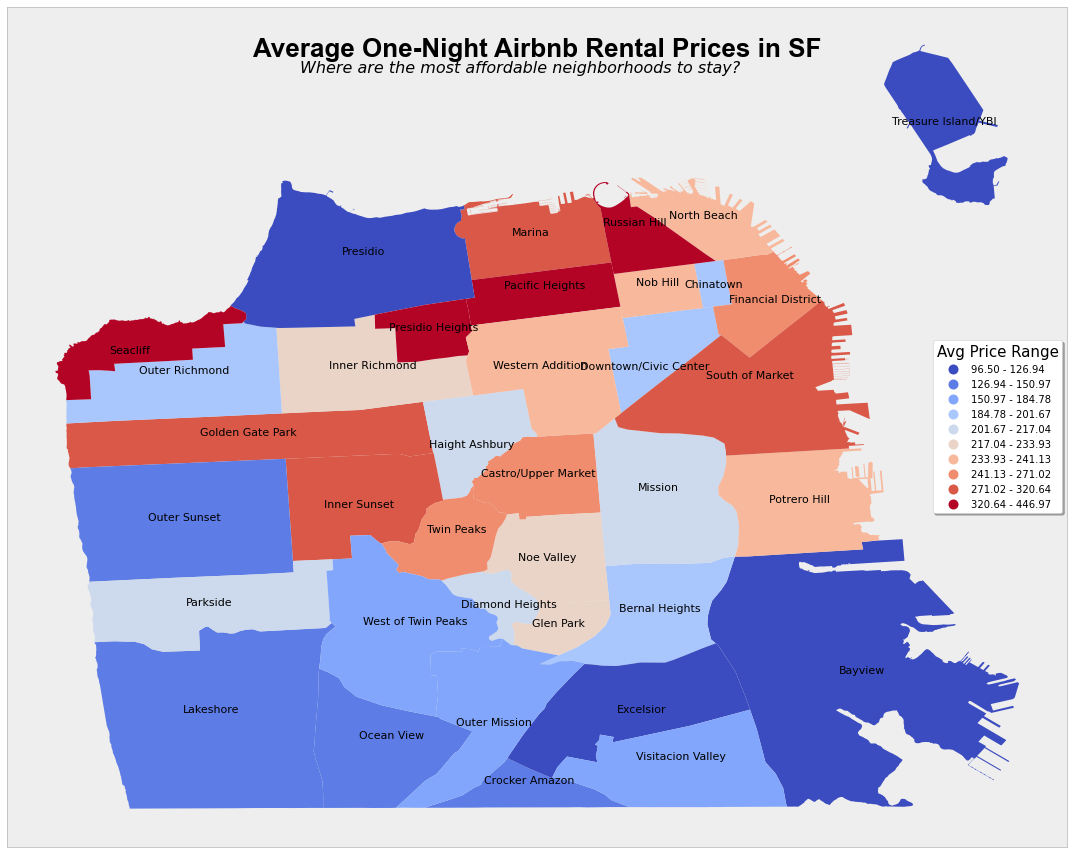

In [136]:
#Plot geodata to reflect average price for a one night stay per neighborhood
ax = neighbourhoods.plot(column ='avg_price', legend = True,cmap="coolwarm",
                        legend_kwds={'loc': 'right','title': 'Avg Price Range',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighbourhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],color = 'black',fontsize =11,
                 horizontalalignment='center')

###Set plot aesthetics###
#Title
ax.set_title('Average One-Night Airbnb Rental Prices in SF', fontsize =26,
              fontname='Arial',fontweight = 'semibold', pad = -50)

plt.suptitle('Where are the most affordable neighborhoods to stay?', y = .77, fontsize =16,
              style = 'italic')

#Ticks
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)
# plt.axis('off')
plt.grid(b=None)

# #Save to Visualizations file
# plt.savefig(eda_path + '/geopandas_rent.png', bbox_inches='tight')

**Which hosts own the most Airbnb properties**

In [228]:
#Capture host_ids with the most listings
property_counts = df.groupby(['host_id','host_name'])['calculated_host_listings_count'].count().reset_index()

property_counts.sort_values(by='calculated_host_listings_count', ascending=False, inplace=True)

#Display top 20
property_counts.head(20)

,host_id,host_name,calculated_host_listings_count
4023,48005494,Zeus,3653
4705,107434423,Blueground,2615
5350,219930816,Sonder San Francisco,2537
1607,4430421,Landmark,1431
4656,103340667,Sheena,1034
5130,173206762,Stratford,611
5570,262211596,Kevin,611
4348,70722023,Michael,594
4760,117141107,Zarinah,592
34,38836,Bernat,538


4 of the top 5 hosts are companies offering fully furnished apartments for rent in San Francisco

In [234]:
big_hosts = property_counts.host_id.head(20).tolist()

temp = df.loc[df['host_id'].isin(big_hosts)]

In [243]:
temp.filter(regex='host|price|minimum').head(10)

,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,minimum_nights,monthly_price,price,weekly_price
9,33,0,0,I love my family without them nothing would b...,1.00,38836,1.00,1.00,39.00,San Francisco California United States,Bernat,Lower Haight,100.00,within a few hours,2009-09-15,email phone reviews jumio govern...,30,nan,177.00,nan
10,33,0,0,I love my family without them nothing would b...,1.00,38836,1.00,1.00,39.00,San Francisco California United States,Bernat,Lower Haight,100.00,within a few hours,2009-09-15,email phone reviews jumio govern...,30,nan,110.00,nan
11,33,0,0,I love my family without them nothing would b...,1.00,38836,1.00,1.00,39.00,San Francisco California United States,Bernat,Lower Haight,100.00,within a few hours,2009-09-15,email phone reviews jumio govern...,30,4800.00,121.00,nan
469,33,0,0,I love my family without them nothing would b...,1.00,38836,1.00,1.00,39.00,San Francisco California United States,Bernat,Lower Haight,100.00,within a few hours,2009-09-15,email phone reviews jumio govern...,30,nan,101.00,nan
591,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,1,nan,180.00,nan
649,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,1,nan,175.00,nan
653,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,2,nan,179.00,nan
685,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,2,nan,169.00,nan
690,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,1,nan,175.00,nan
692,29,29,0,At this point in my life my only hobbies are ...,1.00,6346492,0.00,0.00,68.00,Los Angeles California United States,Dana,Anaheim,nan,NaN,2013-05-12,email phone reviews kba,2,nan,169.00,nan


In [244]:
temp.monthly_price.fillna((temp.minimum_nights * temp.price), inplace = True)

len(temp)

C:\Users\kishe\Miniconda3\envs\EDA\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


18635

In [277]:
temp2 = temp[['last_review','monthly_price']].sort_values(by = 'last_review').dropna()

temp2['month_year'] = temp2['last_review'].dt.to_period('M')

# TO DO

Compare rental costs of the long term companies vs local rental market
    - 

In [277]:
temp2.plot(x=temp2.loc[(temp2.last_review > '2018-01-01')].last_review , y ='monthly_price', figsize = (15,10))

KeyError: "None of [DatetimeIndex(['2018-01-29', '2018-01-29', '2018-01-29', '2018-01-31',\n               '2018-01-31', '2018-01-31', '2018-01-31', '2018-01-31',\n               '2018-01-31', '2018-01-31',\n               ...\n               '2020-04-07', '2020-04-08', '2020-04-12', '2020-04-13',\n               '2020-04-15', '2020-04-17', '2020-04-18', '2020-04-20',\n               '2020-05-01', '2020-05-02'],\n              dtype='datetime64[ns]', length=8583, freq=None)] are in the [columns]"

In [269]:
temp2 = temp2.groupby('month_year')['monthly_price'].mean().reset_index()

temp2.set_index('month_year', inplace=True)

*Compare long term rent to local market
*What kinds of properties?
    *maybe stack comapred to 

### Comparing renter's market to Airbnb long-term hosts

**Read in/prepare Zillow Data**

In [270]:
#Read in Zillow data
zillow = pd.read_csv(path + '/2020_0526_Zillow_Cleaned.csv', index_col=0, parse_dates=['month_year'])

#Subset infromation pertaining to San Francisco and store as sf_rent
sf_rent = zillow.loc[zillow.regionname.str.contains('San Fran')]

#Set month_year as index
sf_rent.set_index('month_year', inplace = True)

#Check
display(sf_rent.head())

,regionname,rent
month_year,,
2014-01-01,"San Francisco, CA",2043.00
2014-02-01,"San Francisco, CA",2101.00
2014-03-01,"San Francisco, CA",2105.00
2014-04-01,"San Francisco, CA",2121.00
2014-05-01,"San Francisco, CA",2191.00


**SF Rental Time plot**

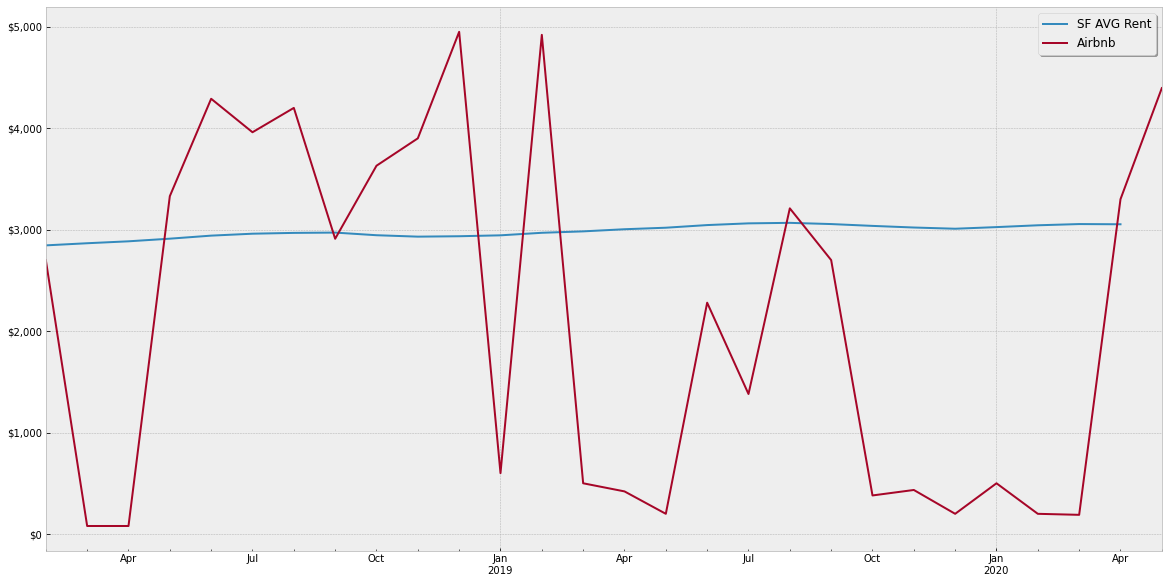

In [271]:
#Create figure
f, ax = plt.subplots(figsize = (20,10))

#Plot sf rental data
sf_rent.iloc[sf_rent.index > '2018-01-01'].plot(ax = ax, label = 'SF AVG Rent')
temp2.iloc[temp2.index > '2018-01-01'].plot(ax = ax, label = 'SF AVG Rent')

###Set plot aesthetics###

#Axes
ax.set_xlabel('')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))


#Legend
ax.legend(['SF AVG Rent','Airbnb'], shadow = True, fontsize = 12)